In [2]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, precision_recall_curve, auc
from keras import optimizers

#### Read the file and check the column keys and names

In [47]:
# Read the h5 file., check for the columns / keys and load data appropriately
with h5py.File("SVHN_single_grey1.h5",'r') as hdf:
    print(list(hdf.keys()))
    xtrain = np.array(hdf.get('X_train'))
    ytrain = np.array(hdf.get('y_train'))
    xtest  = np.array(hdf.get('X_test'))
    ytest  = np.array(hdf.get('y_test'))
    xval   = np.array(hdf.get('X_val'))
    yval   = np.array(hdf.get('y_val'))  

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [48]:
xtest[2],ytest[2]

(array([[133.255 , 134.7279, 136.3148, ..., 103.7248, 100.8391, 100.6111],
        [134.2549, 135.8418, 138.3146, ..., 117.1965, 114.1968, 114.0828],
        [136.2547, 135.9558, 137.4287, ..., 126.8535, 123.7398, 123.4409],
        ...,
        [135.4136, 133.4847, 131.2569, ..., 129.0552, 131.642 , 133.4569],
        [129.3972, 128.7671, 127.8381, ..., 128.5822, 129.2832, 129.9842],
        [119.0823, 120.8649, 123.0496, ..., 128.1801, 127.8103, 128.2124]],
       dtype=float32), 2)

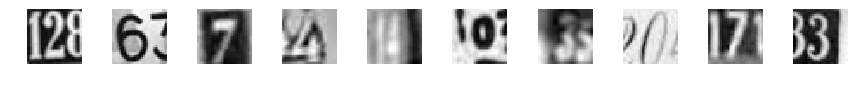

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [49]:
%matplotlib inline
plt.figure(figsize=(15, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(xtrain[i].reshape(32,32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (ytrain[0:10]))

In [50]:
print(xtrain.shape,ytrain.shape)
print(xval.shape,yval.shape)
print(xtest.shape,ytest.shape)

(42000, 32, 32) (42000,)
(60000, 32, 32) (60000,)
(18000, 32, 32) (18000,)


### Reshape the data Xtest, XTrain, XVal

In [51]:
# Reshape the data Xtest  and xtrain
xtrain = xtrain.reshape(xtrain.shape[0],1024)
xval = xval.reshape(xval.shape[0],1024)
xtest = xtest.reshape(xtest.shape[0],1024)
print(xtrain.shape,xval.shape,xtest.shape)

(42000, 1024) (60000, 1024) (18000, 1024)


### Normalize the data

In [52]:
# Normalize the data
xtrain = xtrain/255.0
xval = xval/255.0
xtest = xtest/255.0

### Flatten the data

In [53]:
# Flatten the data
x_train = []
x_test = []
x_val = []
for i in range(42000):
    x_train.append(xtrain[i,:].flatten())
for i in range(60000):
    x_val.append(xval[i,:].flatten())
for i in range(18000):
    x_test.append(xtest[i,:].flatten())

### Subset the data due to computational difficulties

In [54]:
## As considering the entire dataset is taking a lot of time to execute, we are subsetting it.
x_train = x_train[:4000]
ytrain= ytrain[:4000]
x_test = x_test[:1000]
ytest = ytest[:1000]
x_val = x_val[:2000]
yval = yval[:2000]

### Implementing K Nearest Neighbor

In [55]:
# Implementing KNearest Classifier

neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
val_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, ytrain)
    train_accuracy[i] = knn.score(x_train, ytrain)
    val_accuracy[i] = knn.score(x_val, yval)

In [56]:
for i in range(len(train_accuracy)):
    print(train_accuracy[i],val_accuracy[i])

1.0 0.3955
0.645 0.5465
0.59625 0.5915
0.58825 0.581
0.57575 0.554
0.55925 0.535
0.54325 0.5135
0.53575 0.5175
0.52375 0.51
0.51675 0.5145
0.5045 0.5245
0.50025 0.52
0.49925 0.5025
0.49425 0.507


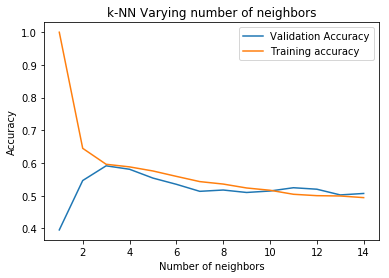

In [57]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, val_accuracy, label='Validation Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### From the graph it is understtod that the best value of k can be 3 or 4. Therefore retrain the algorithm

In [58]:
#  Retrain the model with best value of K
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, ytrain)
predictions = model.predict(x_test)

In [59]:
print(predictions[:5])

[1 7 1 8 0]


In [60]:

print("EVALUATION ON TESTING DATA")
print(classification_report(ytest, predictions))

print ("Confusion matrix")
print(confusion_matrix(ytest,predictions))


EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.29      0.57      0.39       117
           1       0.31      0.65      0.42        93
           2       0.26      0.24      0.25        92
           3       0.22      0.27      0.24        85
           4       0.55      0.43      0.48        96
           5       0.37      0.19      0.25       105
           6       0.33      0.22      0.27        94
           7       0.66      0.42      0.51       107
           8       0.38      0.21      0.27       100
           9       0.39      0.24      0.30       111

   micro avg       0.35      0.35      0.35      1000
   macro avg       0.38      0.34      0.34      1000
weighted avg       0.38      0.35      0.34      1000

Confusion matrix
[[67  5  5  8  6  4  7  2  7  6]
 [ 9 60  7  9  3  1  2  1  0  1]
 [11 23 22 14  2  3  2  5  4  6]
 [15 17  9 23  2  7  3  3  3  3]
 [14 20  6  4 41  2  1  2  4  2]
 [20 17  9 18  1 20  8  1  6  5]

In [61]:
def accuracy(val1,val2):
    count = 0
    for i in range(len(val1)):
        if val1[i] == val2[i]:
            count = count +1
    acc = count / len(val1)
    return acc

In [62]:
accu = accuracy(ytest,predictions)
print(accu)

0.347


In [63]:
#  Retrain the model with best value of K
model = KNeighborsClassifier(n_neighbors=15)
model.fit(x_train, ytrain)
predictions = model.predict(x_test)

In [64]:
print("EVALUATION ON TESTING DATA")
print(classification_report(ytest, predictions))

print ("Confusion matrix")
print(confusion_matrix(ytest,predictions))


EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.35      0.62      0.44       117
           1       0.31      0.56      0.40        93
           2       0.44      0.36      0.40        92
           3       0.29      0.32      0.30        85
           4       0.47      0.45      0.46        96
           5       0.40      0.18      0.25       105
           6       0.31      0.27      0.29        94
           7       0.58      0.49      0.53       107
           8       0.44      0.27      0.33       100
           9       0.35      0.26      0.30       111

   micro avg       0.38      0.38      0.38      1000
   macro avg       0.39      0.38      0.37      1000
weighted avg       0.39      0.38      0.37      1000

Confusion matrix
[[72  6  1  3 12  3  8  2  4  6]
 [11 52  5  7  5  3  5  4  1  0]
 [ 3 15 33 11  2  1  3  8  7  9]
 [11 16  7 27  0  7  4  6  5  2]
 [ 8 16  4  7 43  1  7  3  1  6]
 [20 20  6 13  1 19 11  2  5  8]

In [65]:
accu = accuracy(ytest,predictions)
print(accu)

0.379


### On Training data the average seems to be around 55% but on test data, we are able to achieve only 38%. So the model has not learned properly and is underfit

In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(7,21)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
knn_cv.best_score_

0.327

## Neural Network

In [1]:
import tensorflow as tf
import keras
from keras import losses
from keras.models import Sequential
from keras import optimizers
from keras.layers import MaxPooling2D,BatchNormalization,Dense

Using TensorFlow backend.


In [3]:
with h5py.File("SVHN_single_grey1.h5",'r') as hdf:
    print(list(hdf.keys()))
    xtrain = np.array(hdf.get('X_train'))
    ytrain = np.array(hdf.get('y_train'))
    xtest  = np.array(hdf.get('X_test'))
    ytest  = np.array(hdf.get('y_test'))
    xval   = np.array(hdf.get('X_val'))
    yval   = np.array(hdf.get('y_val'))  

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [4]:
print('Training set', xtrain.shape, ytrain.shape)
print('Test set', xtest.shape, ytest.shape)
print('val set', xval.shape, yval.shape)

Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)
val set (60000, 32, 32) (60000,)


### Reshape data

In [5]:
## Reshape the data for X
xtrain = xtrain.reshape(xtrain.shape[0],1024)
xtest =xtest.reshape(xtest.shape[0],1024)
xval = xval.reshape(xval.shape[0],1024)

### Normalize data . make data values between 0 and 1,[dividing values by 255 ]

In [6]:
xtrain = xtrain/255
xtest = xtest/255
xval = xval/255

In [7]:
print('Training set', xtrain.shape, ytrain.shape)
print('Test set', xtest.shape, ytest.shape)
print('val set', xval.shape, yval.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)
val set (60000, 1024) (60000,)


##### Reshape / Flatten code [ optional flatten if done reshape]

### As the labels are 10., one hot encode the label data

In [8]:
# One hot encode y
y_train = np_utils.to_categorical(ytrain)
y_test = np_utils.to_categorical(ytest)
y_val = np_utils.to_categorical(yval)

In [9]:
print('Training set', xtrain.shape, y_train.shape)
print('Validation set',xval.shape,y_val.shape)
print('Test set', xtest.shape, y_test.shape)

Training set (42000, 1024) (42000, 10)
Validation set (60000, 1024) (60000, 10)
Test set (18000, 1024) (18000, 10)


### Relu Activation function, working with different learning rate

In [10]:
def NN_model_Dense(learning_rate):
    
    model = Sequential()
    model.add(Dense(256, activation='relu',input_shape = (1024, )))
    model.add(Dense(64,activation='relu'))    
    model.add(Dense(32,activation='relu'))  
    model.add(Dense(10,activation='softmax'))
    
    sgd = optimizers.SGD(lr = learning_rate)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [11]:
model_Dense = NN_model_Dense(0.001)
NN_model_Dense_history = model_Dense.fit(xtrain, y_train, epochs = 10, verbose = 1)

W0810 18:32:09.951967  6216 deprecation_wrapper.py:119] From C:\Users\20012\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 18:32:09.998940  6216 deprecation_wrapper.py:119] From C:\Users\20012\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 18:32:10.005935  6216 deprecation_wrapper.py:119] From C:\Users\20012\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 18:32:10.111095  6216 deprecation_wrapper.py:119] From C:\Users\20012\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Opti

Epoch 1/10
42000/42000 [==============================] - 7s 169us/step - loss: 2.3026 - acc: 0.1115
Epoch 2/10
42000/42000 [==============================] - 7s 165us/step - loss: 2.2950 - acc: 0.1287
Epoch 3/10
42000/42000 [==============================] - 7s 164us/step - loss: 2.2898 - acc: 0.1420
Epoch 4/10
42000/42000 [==============================] - 7s 166us/step - loss: 2.2841 - acc: 0.1537
Epoch 5/10
42000/42000 [==============================] - 7s 163us/step - loss: 2.2768 - acc: 0.1668
Epoch 6/10
42000/42000 [==============================] - 7s 165us/step - loss: 2.2680 - acc: 0.1863
Epoch 7/10
42000/42000 [==============================] - 7s 164us/step - loss: 2.2582 - acc: 0.2011
Epoch 8/10
42000/42000 [==============================] - 7s 167us/step - loss: 2.2470 - acc: 0.2177
Epoch 9/10
42000/42000 [==============================] - 7s 165us/step - loss: 2.2336 - acc: 0.2303
Epoch 10/10
42000/42000 [==============================] - 7s 164us/step - loss: 2.2179 - a

In [12]:
model_Dense = NN_model_Dense(0.01)
NN_model_Dense_history = model_Dense.fit(xtrain, y_train, epochs = 30, verbose = 1)

Epoch 1/30
42000/42000 [==============================] - 7s 165us/step - loss: 2.2744 - acc: 0.1432
Epoch 2/30
42000/42000 [==============================] - 7s 164us/step - loss: 2.1022 - acc: 0.2507
Epoch 3/30
42000/42000 [==============================] - 7s 172us/step - loss: 1.7913 - acc: 0.4036
Epoch 4/30
42000/42000 [==============================] - 7s 164us/step - loss: 1.5059 - acc: 0.5162
Epoch 5/30
42000/42000 [==============================] - 7s 165us/step - loss: 1.3214 - acc: 0.5841
Epoch 6/30
42000/42000 [==============================] - 7s 165us/step - loss: 1.2148 - acc: 0.6215
Epoch 7/30
42000/42000 [==============================] - 7s 164us/step - loss: 1.1395 - acc: 0.6479
Epoch 8/30
42000/42000 [==============================] - 7s 164us/step - loss: 1.0748 - acc: 0.6686
Epoch 9/30
42000/42000 [==============================] - 7s 165us/step - loss: 1.0232 - acc: 0.6835
Epoch 10/30
42000/42000 [==============================] - 7s 167us/step - loss: 0.9828 - a

In [13]:
results = model_Dense.evaluate(xtest, y_test)
print(results)

18000/18000 [==============================] - 1s 38us/step
[0.7276335886319478, 0.7802777777777777]


### Compared with the earlier learning rate., 0.01 is good leading to 80% accuracy but, loss could be further worked on by increasing training. Even the test accuracy is good., but loss is again high

### With Batch Normalization

In [14]:
from keras.utils import np_utils
def nn_model():
    model = Sequential()
    model.add(BatchNormalization())
    model.add(Dense(256,activation = 'relu'))
    model.add(Dense(64,activation = 'relu'))
    model.add(Dense(32,activation = 'relu'))
    model.add(Dense(16,activation = 'relu'))
    model.add(Dense(10,activation = 'softmax'))
    
    sgd = optimizers.adam(lr = 1e-3)
    model.compile(loss = losses.categorical_crossentropy,optimizer=sgd,metrics = ['accuracy'])
    return model

In [15]:
model_seq = nn_model()

In [16]:
NN_Built_model = model_seq.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 30,batch_size = 300,verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 5s 127us/step - loss: 1.7024 - acc: 0.4146 - val_loss: 1.2118 - val_acc: 0.6195
Epoch 2/30
42000/42000 [==============================] - 5s 116us/step - loss: 1.0818 - acc: 0.6666 - val_loss: 0.9078 - val_acc: 0.7251
Epoch 3/30
42000/42000 [==============================] - 5s 115us/step - loss: 0.8649 - acc: 0.7347 - val_loss: 0.8072 - val_acc: 0.7554
Epoch 4/30
42000/42000 [==============================] - 5s 118us/step - loss: 0.7628 - acc: 0.7660 - val_loss: 0.7214 - val_acc: 0.7798
Epoch 5/30
42000/42000 [==============================] - 5s 116us/step - loss: 0.6953 - acc: 0.7875 - val_loss: 0.6589 - val_acc: 0.8015
Epoch 6/30
42000/42000 [==============================] - 5s 117us/step - loss: 0.6436 - acc: 0.8025 - val_loss: 0.6398 - val_acc: 0.8043
Epoch 7/30
42000/42000 [==============================] - 5s 116us/step - loss: 0.6077 - acc: 0.8124 - val_loss: 0.5936 - 

### Batch normalization helped improve the accuracy and decrease the loss compared with earlier implementation without batch normalization.

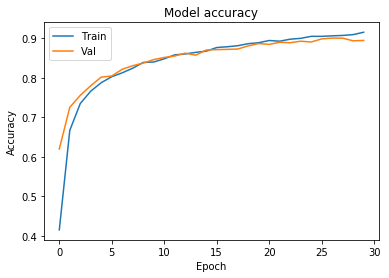

In [18]:
# Plot training & validation accuracy values
plt.plot(NN_Built_model.history['acc'])
plt.plot(NN_Built_model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

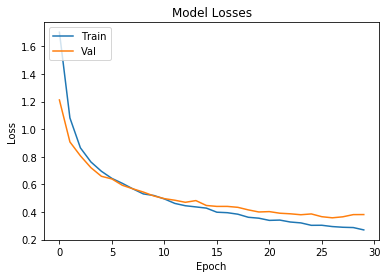

In [19]:
# Plot training & validation Losses values
plt.plot(NN_Built_model.history['loss'])
plt.plot(NN_Built_model.history['val_loss'])
plt.title('Model Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Compared to KNN., Neural network with batch normalization has a better accuracy with around 89%. Both validation accuracy and training accuracy are close by. Loss is also good.

In [20]:
model_seq.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                170       
Total params: 285,722
Trainable params: 283,674
Non-trainable params: 2,048
_________________________________________________________________


In [21]:
NN_Built_model = model_seq.fit(xtest,y_test,epochs = 10,batch_size = 300,verbose = 1)

Epoch 1/10
18000/18000 [==============================] - 1s 82us/step - loss: 0.6844 - acc: 0.8129
Epoch 2/10
18000/18000 [==============================] - 2s 86us/step - loss: 0.5375 - acc: 0.8409
Epoch 3/10
18000/18000 [==============================] - 1s 80us/step - loss: 0.4644 - acc: 0.8623: 1s - loss: 0
Epoch 4/10
18000/18000 [==============================] - 1s 79us/step - loss: 0.4227 - acc: 0.8734
Epoch 5/10
18000/18000 [==============================] - 1s 79us/step - loss: 0.3936 - acc: 0.8788
Epoch 6/10
18000/18000 [==============================] - 1s 80us/step - loss: 0.3681 - acc: 0.8872
Epoch 7/10
18000/18000 [==============================] - 1s 79us/step - loss: 0.3512 - acc: 0.8937
Epoch 8/10
18000/18000 [==============================] - 1s 80us/step - loss: 0.3357 - acc: 0.8949
Epoch 9/10
18000/18000 [==============================] - 1s 79us/step - loss: 0.3145 - acc: 0.9029
Epoch 10/10
18000/18000 [==============================] - 1s 80us/step - loss: 0.3006

### We can see that the model has performed well on test data as well with less loss.

In [22]:
model_seq.evaluate(xtest,y_test)

18000/18000 [==============================] - 1s 48us/step


[0.2651567802131176, 0.9205555555555556]

In [23]:
print(model_seq.metrics_names)
print(NN_Built_model) 

['loss', 'acc']


In [24]:
NN_Model_Predicted_Y = model_seq.predict_classes(xtest)

In [25]:
print(ytest[:10],NN_Model_Predicted_Y[:10])

[1 7 2 9 0 9 1 8 4 4] [1 7 2 9 0 9 1 8 4 4]


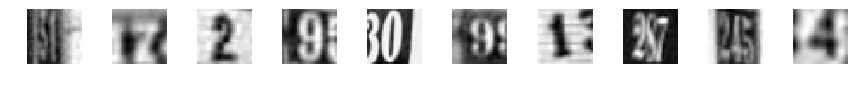

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


In [26]:
plt.figure(figsize=(15, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(xtest[i].reshape(32,32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (ytest[:10]))

### As the images are too blurry, our Neural network couldn't predict more accurately.

### We can still try to improve accuracy by using techniques like data augumentation, drop outs etc.,

In [27]:
def nn_model_withdropouts():
    model = Sequential()
    model.add(BatchNormalization())
    model.add(Dense(256,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(34,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation = 'softmax'))
    
    sgd = optimizers.adam(lr = 1e-3)
    model.compile(loss = losses.categorical_crossentropy,optimizer=sgd,metrics = ['accuracy'])
    return model

In [28]:
from keras.layers import Dropout
nn_seq_dropout = nn_model_withdropouts()
Dropout_NN = nn_seq_dropout.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 30,batch_size = 300,verbose = 1)


W0810 18:47:54.561244  6216 deprecation.py:506] From C:\Users\20012\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 6s 137us/step - loss: 2.3530 - acc: 0.1235 - val_loss: 2.1667 - val_acc: 0.2174
Epoch 2/30
42000/42000 [==============================] - 5s 123us/step - loss: 2.1184 - acc: 0.2145 - val_loss: 1.8193 - val_acc: 0.4164
Epoch 3/30
42000/42000 [==============================] - 5s 123us/step - loss: 1.9254 - acc: 0.3011 - val_loss: 1.5817 - val_acc: 0.5131
Epoch 4/30
42000/42000 [==============================] - 5s 124us/step - loss: 1.8168 - acc: 0.3420 - val_loss: 1.4935 - val_acc: 0.5332
Epoch 5/30
42000/42000 [==============================] - 5s 124us/step - loss: 1.7390 - acc: 0.3760 - val_loss: 1.3838 - val_acc: 0.5789
Epoch 6/30
42000/42000 [==============================] - 5s 128us/step - loss: 1.6720 - acc: 0.4001 - val_loss: 1.3279 - val_acc: 0.5932
Epoch 7/30
42000/42000 [==============================] - 5s 126us/step - loss: 1.6083 - acc: 0.4310 - val_loss: 1.2753 - 

### Compared to the above method, Dropout didnot improve a much. Here validation accuracy is higher than training accuracy, leading to Underfitting... and also loss is high

In [29]:
result_dropout = nn_seq_dropout.evaluate(xtest,y_test)

18000/18000 [==============================] - 1s 51us/step


In [30]:
print(result_dropout)

[0.7619999198118845, 0.7882222222222223]


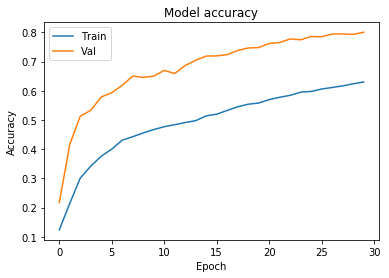

In [31]:
# Plot training & validation accuracy values
plt.plot(Dropout_NN.history['acc'])
plt.plot(Dropout_NN.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

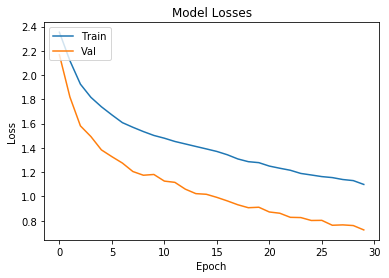

In [32]:
# Plot training & validation loss
plt.plot(Dropout_NN.history['loss'])
plt.plot(Dropout_NN.history['val_loss'])
plt.title('Model Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Using Activation functions and "he" initializer

In [33]:
def NN_activation(activation_fun,learn_rate):
    model = Sequential()
    
    model.add(Dense(256, activation = activation_fun,input_shape = (1024, ), kernel_initializer='he_normal'))     
    model.add(Dense(124, activation=activation_fun,kernel_initializer='he_normal'))                            
    model.add(Dense(64, activation = activation_fun,kernel_initializer='he_normal'))                           
    model.add(Dense(32, activation= activation_fun, kernel_initializer='he_normal'))    
    model.add(Dense(10, activation='softmax',kernel_initializer='he_normal'))                            
   
    sgd = optimizers.SGD(lr = learn_rate)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [34]:
model = NN_activation('sigmoid',0.01)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 30,batch_size = 300,verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 3s 80us/step - loss: 2.4138 - acc: 0.0997 - val_loss: 2.3177 - val_acc: 0.1000
Epoch 2/30
42000/42000 [==============================] - 3s 72us/step - loss: 2.3073 - acc: 0.1005 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 3/30
42000/42000 [==============================] - 3s 67us/step - loss: 2.3029 - acc: 0.1024 - val_loss: 2.3027 - val_acc: 0.0993
Epoch 4/30
42000/42000 [==============================] - 3s 69us/step - loss: 2.3027 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1019
Epoch 5/30
42000/42000 [==============================] - 3s 66us/step - loss: 2.3027 - acc: 0.1003 - val_loss: 2.3026 - val_acc: 0.1005
Epoch 6/30
42000/42000 [==============================] - 3s 67us/step - loss: 2.3027 - acc: 0.0994 - val_loss: 2.3027 - val_acc: 0.0985
Epoch 7/30
42000/42000 [==============================] - 3s 69us/step - loss: 2.3027 - acc: 0.1017 - val_loss: 2.3027 - val_acc

In [35]:
model = NN_activation('relu',0.001)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 30,batch_size = 300,verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 3s 77us/step - loss: 2.3298 - acc: 0.0998 - val_loss: 2.3060 - val_acc: 0.1053
Epoch 2/30
42000/42000 [==============================] - 3s 68us/step - loss: 2.3031 - acc: 0.1070 - val_loss: 2.3000 - val_acc: 0.1090
Epoch 3/30
42000/42000 [==============================] - 3s 70us/step - loss: 2.2986 - acc: 0.1111 - val_loss: 2.2967 - val_acc: 0.1136
Epoch 4/30
42000/42000 [==============================] - 3s 67us/step - loss: 2.2957 - acc: 0.1167 - val_loss: 2.2944 - val_acc: 0.1192
Epoch 5/30
42000/42000 [==============================] - 3s 68us/step - loss: 2.2935 - acc: 0.1225 - val_loss: 2.2924 - val_acc: 0.1252
Epoch 6/30
42000/42000 [==============================] - 3s 69us/step - loss: 2.2915 - acc: 0.1279 - val_loss: 2.2904 - val_acc: 0.1300
Epoch 7/30
42000/42000 [==============================] - 3s 68us/step - loss: 2.2896 - acc: 0.1335 - val_loss: 2.2885 - val_acc

In [36]:
model = NN_activation('relu',0.01)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 30,batch_size = 300,verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 3s 80us/step - loss: 2.3043 - acc: 0.1118 - val_loss: 2.2934 - val_acc: 0.1260
Epoch 2/30
42000/42000 [==============================] - 3s 66us/step - loss: 2.2862 - acc: 0.1415 - val_loss: 2.2783 - val_acc: 0.1600
Epoch 3/30
42000/42000 [==============================] - 3s 66us/step - loss: 2.2684 - acc: 0.1722 - val_loss: 2.2599 - val_acc: 0.1737
Epoch 4/30
42000/42000 [==============================] - 3s 67us/step - loss: 2.2463 - acc: 0.1985 - val_loss: 2.2345 - val_acc: 0.2107
Epoch 5/30
42000/42000 [==============================] - 3s 67us/step - loss: 2.2186 - acc: 0.2300 - val_loss: 2.2000 - val_acc: 0.2512
Epoch 6/30
42000/42000 [==============================] - 3s 67us/step - loss: 2.1808 - acc: 0.2616 - val_loss: 2.1647 - val_acc: 0.2358
Epoch 7/30
42000/42000 [==============================] - 3s 69us/step - loss: 2.1338 - acc: 0.2867 - val_loss: 2.1009 - val_acc

### Implementing Data Augumentation


In [37]:
with h5py.File("SVHN_single_grey1.h5",'r') as hdf:
    print(list(hdf.keys()))
    xtrain = np.array(hdf.get('X_train'))
    ytrain = np.array(hdf.get('y_train'))
    xtest  = np.array(hdf.get('X_test'))
    ytest  = np.array(hdf.get('y_test'))
    xval   = np.array(hdf.get('X_val'))
    yval   = np.array(hdf.get('y_val')) 

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


### ImageDataGenerator

In [38]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=90,horizontal_flip=True, vertical_flip=True,zca_whitening=True)

C:\Users\20012\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [39]:
xtrain = xtrain.reshape([-1,32,32,1])
datagen.fit(xtrain)

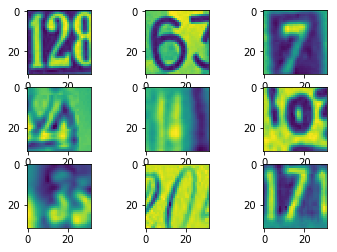

In [40]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(xtrain[i].reshape(32,32))
plt.show()

In [41]:
print(xtrain.shape)
type(xtrain)

(42000, 32, 32, 1)


numpy.ndarray

### Reshape / Flatten the data

In [42]:
train_features = xtrain.reshape(42000, 1024)
print(train_features.shape)
test_features = xtest.reshape(18000, 1024)
print(test_features.shape)
val_features = xval.reshape(60000, 1024)
print(val_features.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)


### One hot encode Label data

In [43]:
y_train = np_utils.to_categorical(ytrain)
y_test = np_utils.to_categorical(ytest)
y_val = np_utils.to_categorical(yval)

### Normalize Data

In [44]:
train_features /= 255.0
test_features /= 255.0
val_features /= 255.0

In [45]:
aug_model_Dense = NN_model_Dense(0.01)
aug_model_history = aug_model_Dense.fit(train_features, y_train, epochs = 30, verbose = 1)

Epoch 1/30
42000/42000 [==============================] - 8s 181us/step - loss: 2.2871 - acc: 0.1375
Epoch 2/30
42000/42000 [==============================] - 7s 174us/step - loss: 2.1777 - acc: 0.2529
Epoch 3/30
42000/42000 [==============================] - 7s 172us/step - loss: 1.8506 - acc: 0.3664
Epoch 4/30
42000/42000 [==============================] - 7s 173us/step - loss: 1.5810 - acc: 0.4727
Epoch 5/30
42000/42000 [==============================] - 7s 173us/step - loss: 1.3878 - acc: 0.5578
Epoch 6/30
42000/42000 [==============================] - 7s 170us/step - loss: 1.2462 - acc: 0.6104
Epoch 7/30
42000/42000 [==============================] - 7s 176us/step - loss: 1.1555 - acc: 0.6423
Epoch 8/30
42000/42000 [==============================] - 7s 174us/step - loss: 1.0853 - acc: 0.6640
Epoch 9/30
42000/42000 [==============================] - 8s 179us/step - loss: 1.0320 - acc: 0.6816
Epoch 10/30
42000/42000 [==============================] - 8s 179us/step - loss: 0.9849 - a

In [46]:
Augument_Result = aug_model_Dense.evaluate(test_features,y_test)
print(result_dropout)

18000/18000 [==============================] - 1s 53us/step
[0.7619999198118845, 0.7882222222222223]


### Inferences :
1. Implemented knn on partial dataset due to computational difficulties
2. Calculated accuracy and computed confusion matrix, classification report
3. KNN provides an accuracy of 38% 

1. Implemented feed forward Neural network with following variations:
2. Relu Activation func . with different learning rates 
	with 0.001 the accuracy is 24%
	with 0.01 the accuracy is 80% with loss 0.622.
	Hence on test data., we achieved accuracy of 78% it is reasonable with a loss of 0.72.
	Further to improve accuracy., we can have other methods like dropouts, batch normalization, data augumentation
3. With Batchnormalization and Relu activation:
	we achieve accuracy of 89% and loss of 0.27. 
	Good improvement compared with previous neural network without batch normalization.
	on Test data., we acheived 92% accuracy and loss of 0.26. 
4. With dropouts.
	Dropout helps to overfit the data by generalizing the model.
    The above model with batch normalization though has a good accuracy ., it tnds to slightly overfit as thetest accuracy is greater that validation and training accuracy by 3%. hence dropout can help generalize the model
	Here with the nerural netwrok with Batch normalization and dropout of 0.5., we got only 80% accuracy., which is not bad with a loss of 1.099.
	By further working on learning rate or performing more training., we can improve accuracy.
	The model gave 79% accuracy on test data with loss of 0.76. 
5. With varying activation functions and "He" initializer.
	initially "Sigmoid: Activation function with "He" initializer and lr = 0.01 was tried.
	This method gives us loss of 2.3 and accuracy of 10%
	With "Relu", He initializer and lr = 0.001
	again this method gives us loss of 2.4 and accuracy of 20%
	With "Relu", He initializer and lr =0.01, we are able to achieve accuracy of 68% and loss of 1.08.
    Comparately., "He" initializer didnot show much improvement over Batch normalization and dropout methods.
6. With Data Augumentation:
	we got the accuracy of 81% and loss of 0.61 on training data and on test set,we obtain accuracy of 79% and loss of 76%.
	Earlier with 'Relu' and lr of 0.01, we for 80% accuracy and loss of 0.6.
	Both methods are giving same results and data sugumentation didnot show much improvement on the results.


### Conclusion:
#### Though dropouts have less accuracy compared with Batch normalization., it eneralizes well.
#### On the other hane Batch normalization gives better accuracy and loss compared with rest of the methods.